# Identifying Fraud from Enron Financial and Email Data Set  

## Introduction 

Enron was one of the major American energy companies based originally in Houston, Texas in which by 2002, had completely collapsed into bankruptcy as a result of audit failure and corporate fraud. In this study, we will attempt to build a person of interest identifier based on the Enron dataset which is a dictionary combined from the Enron financial and email data where there exists a one to one correspondence between each person and a key value pair in the dictionary.


## Analysis 

Using the codes below, first we are going to create a scatter plot showing the relationship between the salary and bonus. These features were manually selected because analyzing the salary and bonus distribution may help lead us to identify the POIs (person of interest).

146
94


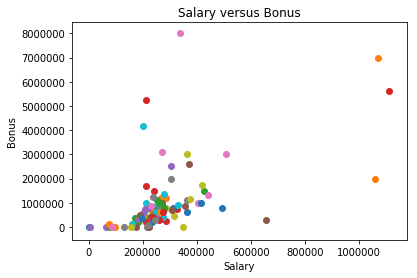

In [33]:

import matplotlib.pyplot as plt
import sys
import pickle
from sklearn import preprocessing
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.grid_search import GridSearchCV
sys.path.append("../tools/")


from feature_format import featureFormat
from feature_format import targetFeatureSplit


## We are loading the dictionary that contains the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

## We are counting the number of exeutives in our data.
print len(data_dict.keys())

## Here we are removing the outliers 
features = ["salary", "bonus"]
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)

## Here we are removing NAN's from our dataset
outliers = []
for key in data_dict:
   val = data_dict[key]['salary']
   if val == 'NaN':
        continue
   outliers.append((key, int(val)))

outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:4])


## Now we are ready to plot the features:
for point in data:
   salary = point[0]
   bonus = point[1]
   plt.scatter( salary, bonus )

plt.title("Salary versus Bonus")
plt.xlabel("Salary")
plt.ylabel("Bonus")

t=0
for point in data:
   t=t+1
print t







Within the salary versus the bonus scatter plot, there is a total of 94 data points. 

There are 146 executives. 

There are 77 non-POIs and 14 POIs. Originally, there were 18 POIs. However, because we will be removing the primary outliers, there will only be 14 POIs in this analysis. 

In the following codes below, we will remove the primary outliers. Since the number of POIs is small, it is not necessary to remove the other outliers apart from the primary ones because removing the additional outliers may further imbalance the dataset.

In [34]:
##The below code corresponds to outliers in terms of salary figure per year. 

outliers_final

[('SKILLING JEFFREY K', 1111258),
 ('LAY KENNETH L', 1072321),
 ('FREVERT MARK A', 1060932),
 ('PICKERING MARK R', 655037)]

The below code corresponds to the outliers in terms of bonus figure per year. 

In [35]:
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

In [36]:
## We're removing outliers below
features = ["salary", "bonus"]
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)

## Now we are removing the NAN's from dataset
outliers2 = []
for key in data_dict:
   val = data_dict[key]['bonus']
   if val == 'NaN':
       continue
   outliers2.append((key, int(val)))

outliers_final2 = (sorted(outliers2,key=lambda x:x[1],reverse=True)[:4])

In [37]:
outliers_final2

[('LAVORATO JOHN J', 8000000),
 ('LAY KENNETH L', 7000000),
 ('SKILLING JEFFREY K', 5600000),
 ('BELDEN TIMOTHY N', 5249999)]

In [38]:
print data_dict['BELDEN TIMOTHY N']
print data_dict['LAVORATO JOHN J']

{'salary': 213999, 'to_messages': 7991, 'deferral_payments': 2144013, 'total_payments': 5501630, 'exercised_stock_options': 953136, 'bonus': 5249999, 'restricted_stock': 157569, 'shared_receipt_with_poi': 5521, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 1110705, 'expenses': 17355, 'loan_advances': 'NaN', 'from_messages': 484, 'other': 210698, 'from_this_person_to_poi': 108, 'poi': True, 'director_fees': 'NaN', 'deferred_income': -2334434, 'long_term_incentive': 'NaN', 'email_address': 'tim.belden@enron.com', 'from_poi_to_this_person': 228}
{'salary': 339288, 'to_messages': 7259, 'deferral_payments': 'NaN', 'total_payments': 10425757, 'exercised_stock_options': 4158995, 'bonus': 8000000, 'restricted_stock': 1008149, 'shared_receipt_with_poi': 3962, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 5167144, 'expenses': 49537, 'loan_advances': 'NaN', 'from_messages': 2585, 'other': 1552, 'from_this_person_to_poi': 411, 'poi': False, 'director_fees': 'NaN', 'deferred_i

Assuming that money played an incentive to commit fraud, we were trying to see if we can find outliers, --people who received unusually high bonuses and salaries. We found that the scatterplot generated 4 outliers in terms of both the salary and bonus. The salary outliers corresponded with the following people: Skilling Jeffrey K, Lay Kenneth L, Frevert Mark A, and Pickering Mark R. The bonus outliers corresponded with the following people: Lavorato John J, Lay Kenneth L, Skilling Jeffrey K, and Belden Timothy N. We see that Skilling Jeffrey K and Lay Kenneth L earned both high salaries and bonuses. However, people who earned high salaries did not necessarily correspond with receiving high bonuses. For example, Lavorato John J and Belden Timothy N received unusually high bonuses but did not turn out to be outliers in terms of salary. 

Since salary income is fixed, let us focus more on the bonus outliers. We expect that high salaries would correspond with earning high bonuses. However, this is not the case according to our data. Lovorato John J earned an unusually high 8,000,000 bonus but his salary figure of 339,288 was not within the outlier range in terms of salary. Also, Belden Timothy N earned a 5,249,999 bonus while his salary figure of 213,999 was no where near the highest salary range in our data. 

The people who earned both high salaries and bonuses were Skilling Jeffrey K and Lay Kenneth L.

Now we're going to run a regression on salary versus bonus. The variance score is 0.32. The data is mainly clustered close to the regression line in the bottom left hand side of the plot below. However, as the salary and the bonus increase, the data becomes more spread out. We see that this regression is not a strong model for our data. 

('Coefficients: \n', array([[ 4.44516239]]))
Mean squared error: 1327632798051.18
Variance score: 0.32


Text(0,0.5,u'Bonus')

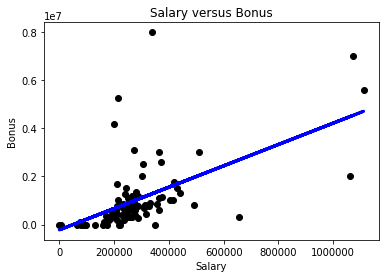

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Create linear regression object
regr = linear_model.LinearRegression()

## X is our salary data 
X=(data[:,0])

## Y is our bonus data 
Y=(data[:,1])

## Train the model using the training sets
regr.fit(X[:, np.newaxis], Y[:, np.newaxis])

## Make predictions using the testing set
Y_pred = regr.predict(X[:, np.newaxis])

## The Coefficients
print('Coefficients: \n', regr.coef_)

## The Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_pred))
## Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y, Y_pred))

## Now we are plotting the outputs:
plt.scatter(X, Y,  color='black')
plt.plot(X, Y_pred, color='blue', linewidth=3)

plt.title("Salary versus Bonus")
plt.xlabel("Salary")
plt.ylabel("Bonus")



We tried to remove our bonus and salary outliers in our linear regression below. 

In [40]:
def removekey(d, key):
   r = dict(d)
   del r[key]
   return r

In [41]:
## Create salary data set and remove the six outliers, same guys from both salary and bonus
outliers_salary = removekey(outliers,outliers_final[0][0])
outliers_salary = removekey(outliers_salary,outliers_final[1][0])
outliers_salary = removekey(outliers_salary,outliers_final[2][0])
outliers_salary = removekey(outliers_salary,outliers_final[3][0])

## We are now removing the salary outliers:
outliers_salary = removekey(outliers_salary,outliers_final2[0][0])
outliers_salary = removekey(outliers_salary,outliers_final2[3][0])

## We are now creating the bonus data set and removing the six outliers, same guys from both salary and bonus
outliers_bonus = removekey(outliers2,outliers_final[0][0])
outliers_bonus = removekey(outliers_bonus,outliers_final[1][0])
outliers_bonus = removekey(outliers_bonus,outliers_final[2][0])
outliers_bonus = removekey(outliers_bonus,outliers_final[3][0])

## We are now removing the bonus outliers
outliers_bonus = removekey(outliers_bonus,outliers_final2[0][0])
outliers_bonus = removekey(outliers_bonus,outliers_final2[3][0])


('Coefficients: \n', array([[-0.73849292]]))
Mean squared error: 573737964088.74
Variance score: 0.01


Text(0,0.5,u'Bonus')

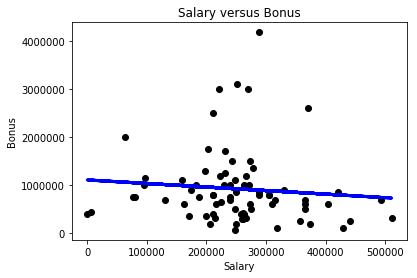

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Create linear regression object
regr = linear_model.LinearRegression()

## X is our salary data 
X=np.array(outliers_salary.values())
X=X[:-13]

## Y is our bonus data 
Y=np.array(outliers_bonus.values())

## We're now training the model using the training sets
regr.fit(X[:, np.newaxis], Y[:, np.newaxis])

## Make predictions using the testing set
Y_pred = regr.predict(X[:, np.newaxis])

## The Coefficients
print('Coefficients: \n', regr.coef_)

## The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_pred))

## Variance score
print('Variance score: %.2f' % r2_score(Y, Y_pred))

## Plot the outputs
plt.scatter(X, Y,  color='black')
plt.plot(X, Y_pred, color='blue', linewidth=3)

plt.title("Salary versus Bonus")
plt.xlabel("Salary")
plt.ylabel("Bonus")



We removed our outliers for bonus and salary in the plot above. However, we discovered that the variance score actually became worse when we removed our outliers. Thus, linear regression is not a good model for analyzing our data. 

We are now going to run a PCA plot for the Salary and Bonus. 0.98928806 and  0.01071194 are our eigenvalues that resulted from our PCA plot. The red corresponds with the direction of the first principal component, and the cyane corresponds with the direction of the second principal component. We see that the red line is a better fit to our data. 

[ 0.98928806  0.01071194]


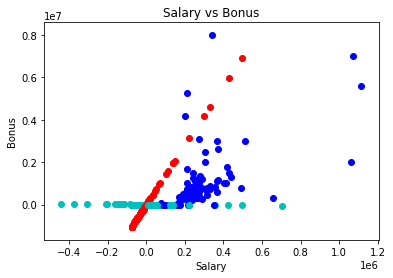

In [43]:
import matplotlib

def doPCA():
    from sklearn.decomposition import PCA 
    pca = PCA(n_components=2)
    pca.fit(data)
    return pca

pca = doPCA()
print pca.explained_variance_ratio_
first_pc = pca.components_[0]
second_pc = pca.components_[1]

transformed_data = pca.transform(data)


for ii, jj in zip(transformed_data,data):
    plt.scatter( first_pc[0]*ii[0], first_pc[1]*ii[0], color="r")
    plt.scatter( second_pc[0]*ii[1], second_pc[1]*ii[1], color="c")
    plt.scatter( jj[0], jj[1], color="b")

plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Salary vs Bonus")

xfmt = matplotlib.ticker.ScalarFormatter()
xfmt.set_powerlimits((-3,3)) 
matplotlib.pyplot.gca().xaxis.set_major_formatter(xfmt) 

We found the POIs from the training set which includes the features as well as the correct answers. Below, the names that resulted as "True" correspond with the POIs. In our case, there are 3 people who are POIs: Jeffrey Skilling, Kenneth Lay, and Timothy Belden.

In [44]:
data_dict["SKILLING JEFFREY K"]["poi"]

True

In [45]:
data_dict["LAVORATO JOHN J"]["poi"]

False

In [46]:
data_dict["LAY KENNETH L"]["poi"]

True

In [47]:
 data_dict["BELDEN TIMOTHY N"]["poi"]

True

In [48]:
data_dict["FREVERT MARK A"]["poi"]

False

In [49]:
data_dict["PICKERING MARK R"]["poi"]

False

In [50]:
### remove any outliers before proceeding further
features = ["salary", "bonus"]
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)

### remove NAN's from dataset
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key, int(val)))

outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:4])
### print top 4 salaries
print outliers_final

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037)]


In [51]:
## NaN is missing value in this case. We're counting the T to findout the missing values. 
T=0

outliers = []
for key in data_dict:
   val = data_dict[key]['salary']
   if val == 'NaN':
        T=T+1
        continue
   outliers.append((key, int(val)))

outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:4])
print T



51


In [52]:
T=0

outliers = []
for key in data_dict:
   val = data_dict[key]['bonus']
   if val == 'NaN':
        T=T+1
        continue
   outliers.append((key, int(val)))

outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:4])
print T


64


There are 51 missing values for the salary feature, and 64 missing values for the bonus feature. 

Because the linear regression was not a good model for our data, we will include the outliers back into our analysis. 

Now, we will create two new features: normalized_email_from_poi and normalized_email-to_poi. These new features were chosen because conceptually, it makes sense to try to analyze the relative proportion of email communications between a poi and another person. Because there were no strong patterns found between the already existing features ('from_poi_to_this_person' and 'from_this_person_to_poi'), we are engineering new features by modifying them through normalization. 

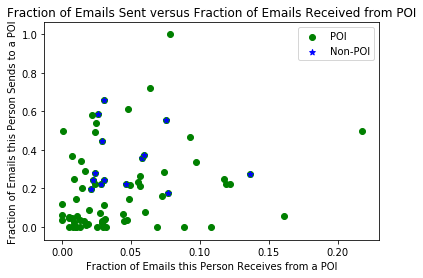

In [53]:
## New chosen features are: normalized_email_to_poi,normalized_email_from_poi

def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

## We are now creating two lists of new features:
normalized_email_from_poi=dict_to_list("from_poi_to_this_person","to_messages")
normalized_email_to_poi=dict_to_list("from_this_person_to_poi","from_messages")

## We are now putting new features into the data_dict
count=0
for i in data_dict:
    data_dict[i]["normalized_email_from_poi"]=normalized_email_from_poi[count]
    data_dict[i]["normalized_email_to_poi"]=normalized_email_to_poi[count]
    count +=1

    
features_list = ["poi", "normalized_email_from_poi", "normalized_email_to_poi"]    

my_dataset = data_dict
data = featureFormat(my_dataset, features_list)

## Now we can plot our new features:

for point in data:
    from_poi = point[1]
    to_poi = point[2]
    x=plt.scatter( from_poi, to_poi, color='green')
    if point[0] == 1:
        y=plt.scatter(from_poi, to_poi, color="blue", marker="*")

plt.legend((x,y),("POI","Non-POI"))
 
    
        
plt.xlabel("Fraction of Emails this Person Receives from a POI")
plt.ylabel("Fraction of Emails this Person Sends to a POI")
plt.title("Fraction of Emails Sent versus Fraction of Emails Received from POI")
plt.show()



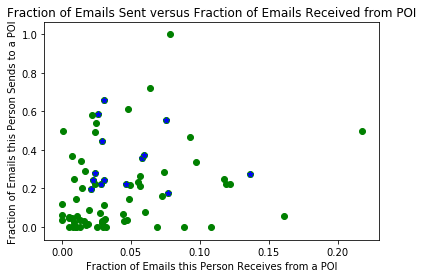

POI:  14
non-POI 77


In [54]:
## Checking and printing to see how many POIs and Non-POIs there are 

number_of_poi = 0
number_of_nonpoi = 0
for point in data:
  from_poi = point[1]
  to_poi = point[2]
  x=plt.scatter( from_poi, to_poi, color='green')
  number_of_nonpoi = number_of_nonpoi+1
  if point[0] == 1:
      y=plt.scatter(from_poi, to_poi, color="blue", marker="*")
      number_of_poi = number_of_poi+1

    
plt.xlabel("Fraction of Emails this Person Receives from a POI")
plt.ylabel("Fraction of Emails this Person Sends to a POI")
plt.title("Fraction of Emails Sent versus Fraction of Emails Received from POI")
plt.show()

print "POI: ", number_of_poi
print "non-POI", number_of_nonpoi



As we can see from the code above, there were originally 18 POIs, but because we removed the primary outliers, there are 14 POIs. There are 77 non-POIs. 

According to the scatter-plot, there is no clear display of pattern. Thus, in our next step, we will be applying the decision tree algorithm to rank the features. We are not going to use feature scaling because it’s not necessary for our decision tree algorithm application. 

We are using the decision tree classifier to score all the possible features according to their ability to match the target function. The features were selected using a semi-automated method-- (introducing human intuition into the feature selection). Semi-automated method in this case means selecting the normalized_email_from_poi and the normalized_email_to_poi features.

In [55]:
##Decision Tree Application 

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


features_list = ["poi","bonus", "salary","normalized_email_from_poi","normalized_email_to_poi",
                 'loan_advances','deferral_payments',
                 'deferred_income', 'total_stock_value', 'exercised_stock_options',
                'restricted_stock_deferred','expenses','long_term_incentive','total_payments', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']

## The below code is to see how many features we have in total from above:
print len(features_list)


data = featureFormat(my_dataset, features_list)

labels, features = targetFeatureSplit(data)

#We are now splitting the data into training versus testing data
from sklearn import cross_validation
features_training, features_testing, labels_training, labels_testing = cross_validation.train_test_split(features, labels, test_size=0.3, random_state=42)



clf = DecisionTreeClassifier(min_samples_split=7)
clf.fit(features_training,labels_training)
score = clf.score(features_testing,labels_testing)
pred= clf.predict(features_testing)
print 'accuracy', score



importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(16):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])





17
accuracy 0.772727272727
Feature Ranking: 
1 feature bonus (0.423529411765)
2 feature salary (0.213025210084)
3 feature normalized_email_from_poi (0.204318689501)
4 feature normalized_email_to_poi (0.0633283693224)
5 feature loan_advances (0.0588235294118)
6 feature deferral_payments (0.036974789916)
7 feature deferred_income (0.0)
8 feature total_stock_value (0.0)
9 feature exercised_stock_options (0.0)
10 feature restricted_stock_deferred (0.0)
11 feature expenses (0.0)
12 feature long_term_incentive (0.0)
13 feature total_payments (0.0)
14 feature shared_receipt_with_poi (0.0)
15 feature restricted_stock (0.0)
16 feature director_fees (0.0)


The reason for choosing the new features (normalized_email_from_poi and normalized_email_to_poi), --is that if there is a high level of email traffic  between a known poi and another employee, it is plausible that the employee may also be a poi.

There are 17 features including the two new features we added in the code above. The scores of the features are displayed above, and our two new features ranked within the top 4. However, because the accuracy score for most of the features turned out to be less than 0.3, we will now try to see if the accuracy can be improved by using different algorithms and applying fine tuning. 

## Fine Tuning 

Models are parameterized in machine learning and their behaviors can be fine tuned. Since a model can have many parameters, we must look for ways to find the best combination of features and parameter settings to enable the selected model to optimally solve the machine learning problem we are trying to study. 

In the context of machine learning, parameter tuning's end goal is to find the best hyper-parameters. Hyperparameters are usually fixed before the training process and are the pre-defined parameters of the model, --i.e. the K of K-means. Learned parameters are the parameters learned automatically in the training process of the model, -- i.e. the coefficient results generated from linear regressions. 

It is important to train different models and experiment with setting different values for the hyperparameters in order to find the optimal hyperparameters. Parameter tuning plays a significant role in machine learning because if the hyperparameters are not set up correctly, a very good algorithm may still output bad results. 

For example, we already observed how the decision tree application did not yield very good results. The problem may be that it isn't the algorithm that is causing the bad results, but that we need to adjust our features and parameters. This reason is why we we need fine tuning. We are now going to select different combinations of features in order to generate a better accuracy score. We are also going to experiment with setting our parameter of min_sample_split to different values in order to observe which specific value generates the best precision score. 

In the following codes below, we will be applying the Naive Bayes and the Decision Tree algorithms for different sets of features and make comparisons.

In [56]:
##Checking to see if the numbers for bonus +salary does indeed = total_payments
#Here, we're just checking for Skilling, Jeffrey. 

data_dict['SKILLING JEFFREY K']["salary"]+data_dict['SKILLING JEFFREY K']["bonus"]

6711258

In [57]:
#Now we're selecting the following features: poi, normalized_email_from_poi, normalized_email_to_poi, and total_payments.

features_list = ["poi","normalized_email_from_poi","normalized_email_to_poi",'total_payments']

t0 = time()

clf = GaussianNB()
clf.fit(features_training, labels_training)
pred = clf.predict(features_testing)
accuracy = accuracy_score(pred,labels_testing)
print accuracy



0.295454545455


When the decision tree algorithm was applied setting the min samples split equal to 7, the accuracy turned out to be 0.77. When we used the Naive Bayes algorithm, our accuracy score resulted as 0.295, --much lower than the decision tree algorithm. Therefore, we can conclude that the Naive Bayes algorithm should not be used to analyze our data. 


Now we are going to experiment with fine tuning our data by changing our parameter which in this case, is the min samples split. When the min samples split was set to 2 (which is the default setting), the accuracy was fairly high with a score of 0.825. However, the accuracy score fluctuated from run to run. Thus, to tune our parameter, the min samples split had to be set to 4. Although the accuracy decreased as we increased the min samples split value, the run to run stability increased, and this is why we set our min samples split to equal 4. 

In [58]:

## Define the list of features according to our previous selection and making a copy of the data dictionary 
features_list = ["poi","normalized_email_from_poi","normalized_email_to_poi",'total_payments']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list)

##Splitting the data into POI and features 
labels, features = targetFeatureSplit(data)


from sklearn import cross_validation
features_training, features_testing, labels_training, labels_testing = cross_validation.train_test_split(features, labels, test_size=0.3, random_state=42)

## Now we want to use K-fold for validation 
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
   

    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier(min_samples_split=2)
clf.fit(features_training,labels_training)
pred= clf.predict(features_testing)
score = clf.score(features_testing,labels_testing)
print 'accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


## Now we are using manual tuning parameter for the min_samples_split=4
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=4)
clf = clf.fit(features_training,labels_training)
pred= clf.predict(features_testing)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_testing, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

## Calculating the ratio of true positives from all positives

print 'precision = ', precision_score(labels_testing,pred)

## Calculating ratio of true positives out of true positives and false negatives

print 'recall = ', recall_score(labels_testing,pred)


pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )


accuracy before tuning  0.825
Decision tree algorithm time: 0.002 s
done in 0.002s
Validating algorithm:
accuracy after tuning =  0.8
precision =  0.25
recall =  0.166666666667


There seems to be a small amount of run to run variability in precision. I believe this is happening due to overfitting when min samples split = 2. 

In [59]:
Average= [0.825,0.825,0.8,0.8,0.825,0.85,0.825]
import numpy as np
print np.mean(Average)


0.821428571429


To fine tune our parameters, we experimented with adjusting the min samples split. We compared the cross validation for min samples split = 2 with the min samples split = 4. The accuracy score before the fine tuning was 0.8. The accuracy score after the fine tuning of our parameter turned out to be 0.825. Thus, there is only a very small variation in the accuracy scores, indicating that the degree of overfitting may not be significant. 

In [60]:
#Here we are calculating the F Beta Score 

from sklearn.metrics import fbeta_score
y_true = labels_testing
y_pred = pred
fbeta_score(y_true, y_pred, average='macro', beta=0.5)


0.54902962206332995

When we used the poi, normalized email from poi, normalized email to  poi, and the total payments features, we could not obtain a high accuracy score. Thus, we are going to experiment with another set of features to see if the different combination of features would yield better results. 

Now, the following codes will run the Naive Bayes and the Decision Tree algorithms for the following combination of features: POI, normalized email from poi, normalized email to poi, and shared receipts with poi.  

In [61]:
#Now we're selecting the following features: poi, normalized_email_from_poi, normalized_email_to_poi, and shared_receipt_with_poi.

features_list = ["poi","normalized_email_from_poi","normalized_email_to_poi",'shared_receipt_with_poi']

t0 = time()

clf = GaussianNB()
clf.fit(features_training, labels_training)
pred = clf.predict(features_testing)
accuracy = accuracy_score(pred,labels_testing)
print accuracy



0.85


We can observe that our accuracy score improved when we changed our feature selection to using shared receipts instead of total payments. Now our accuracy score from running the Naive Bayes algorithm is 0.85, improving significantly from our previous result of 0.29.

The reason why total payments may not have been a good feature selection may be that total payments is the sum of bonus and salary, and this reason may have contributed to our low precision and accuracy scores. We have already seen from running a regression on bonus and salary that these features may not be the most optimal features to use. Shared receipts with POI feature may be a better selection because perhaps intuitively, a stronger relationship is implied between a POI and an employee when there are shared receipts between them. 

In the code below, we're going to see if we can yield better results using the shared receipts instead of total payments in our decision tree algorithm. 

In [62]:
## Define the list of features according to our previous selection and making a copy of the data dictionary 
features_list = ["poi","normalized_email_from_poi","normalized_email_to_poi",'shared_receipt_with_poi']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list)

##Splitting the data into POI and features 
labels, features = targetFeatureSplit(data)


from sklearn import cross_validation
features_training, features_testing, labels_training, labels_testing = cross_validation.train_test_split(features, labels, test_size=0.3, random_state=42)

## Now we want to use K-fold for validation 
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
   

    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier(min_samples_split=2)
clf.fit(features_training,labels_training)
pred= clf.predict(features_testing)
score = clf.score(features_testing,labels_testing)
print 'accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


## Now we are using manual tuning parameter for the min_samples_split=4
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=7)
clf = clf.fit(features_training,labels_training)
pred= clf.predict(features_testing)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_testing, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

## Calculating the ratio of true positives from all positives

print 'precision = ', precision_score(labels_testing,pred)

## Calculating ratio of true positives out of true positives and false negatives

print 'recall = ', recall_score(labels_testing,pred)


pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )


accuracy before tuning  0.884615384615
Decision tree algorithm time: 0.003 s
done in 0.003s
Validating algorithm:
accuracy after tuning =  0.884615384615
precision =  0.666666666667
recall =  0.5


Compared with the total payments feature, using the shared receipt with POI feature shows better stability in the algorithm. We can see that the accuracy does not change as the min samples split value varies. The accuracy remained as 0.884615384615. 

Now, our precision is approximately 0.67 and our recall is 0.5. 

In the code below, we see that our F-Beta score has also improved. Our F-beta score was originally 0.43421052631578944 when we used total payments as one of our features. Now, it is 0.77302631578947367 when we replaced total payments with shared receipt with POI. 

In [63]:
#Here we are calculating the F Beta Score 

from sklearn.metrics import fbeta_score
y_true = labels_testing
y_pred = pred
fbeta_score(y_true, y_pred, average='macro', beta=0.5)


0.77302631578947367

## Validation

Because there is a need to test the stability of a machine learning model, validation is an important step in this project. Validation is the process of deciding whether the numerical results quantifying the hypothesized relationships between the variables are acceptable as described by the data. We also want low bias and variance when we are performing validation. 

Validation is also important because it can test the general power of the model on an unseen dataset. However, validation does not necessarily give a good indication of how well the model will generalize to an independent and unseen data set, but only gives an idea about how well the selected model does on the data used to train it. Therefore, a common problem with validation is under or overfitting of the data. 

We applied the 3-fold cross validation using the following features: POI, normalized email to poi, normalized email from poi, and shared receipt with POI. The min samples split was sensitive when we used these four features. We obtained a precision score of 0.67 and a recall score of 0.5. 

The application of 3-fold cross-validation was used to generate the precision and recall scores. Generally, accuracy score is a good way to evaluate this algorithm. However, 3-fold cross validation may not be the best model to analyze our data because in our case, we have an imbalance issue in that the proportion of POIs is quite small relative to the non POIs. 

Thus, to address this imbalance issue, we are now going to apply the stratified shuffle-split cross-validator. This method provides us with the training/testing indices to split the data in training/testing sets.

We also chose this method because this cross-validation object is a merge of the StratifiedKFold and ShuffleSplit, returning stratified randomized folds. These folds are generated by preserving the percentage of samples for each class. Using the stratified shuffle-split means that the data is shuffled every time, and then split, letting the testing sets overlap between the splits.

In [64]:
#!/usr/bin/python
# Note that this file must be run from within anaconda to insure that all the libraries are found. 
# Note that all personal workspaces have been removed from these codes and it should run in any directory: 
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.cross_validation import StratifiedShuffleSplit
from collections import defaultdict
import sklearn.grid_search
import sklearn.pipeline
import math 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

### Task 1: Select what features you'll use.
### The first feature must be "poi".
finance_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] 
##all units are in US dollars

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
my_dataset = data_dict

### Task 2: Remove outliers

del my_dataset['TOTAL']

### Task 3: Create new feature(s)


features_list = ["poi","normalized_email_from_poi","normalized_email_to_poi",'shared_receipt_with_poi']



def add_new_features(x):    
    """
    Created three ratios based on email : to,from, and shared with POIs
    """
    if(x['from_messages']!='NaN' and x['from_this_person_to_poi']!='NaN'):
        ratio_from_x_to_poi = x['from_this_person_to_poi'] / float(x['from_messages'])
    else:
        ratio_from_x_to_poi = 0.

    if(x['to_messages']!='NaN' or x['from_poi_to_this_person']!='NaN'):
        ratio_from_poi_to_x = x['from_poi_to_this_person'] / float(x['to_messages'])
    else:
        ratio_from_poi_to_x = 0.        

    if(x['to_messages']!='NaN' and x['shared_receipt_with_poi']!='NaN'):
        ratio_shared_receipt_with_poi = x['shared_receipt_with_poi'] / float(x['to_messages'])
    else:
        ratio_shared_receipt_with_poi = 0.

    return ratio_from_x_to_poi , ratio_from_poi_to_x , ratio_shared_receipt_with_poi

#Initialize feature with 0.0
for i in my_dataset:
    my_dataset[i]['ratio_to_poi'] = 0.
    my_dataset[i]['ratio_from_poi'] = 0.
    my_dataset[i]['ratio_shared_receipt'] = 0.

#Set value
for i in my_dataset : 
    ratio_to_poi , ratio_from_poi , ratio_shared_receipt = add_new_features(my_dataset[i])
    my_dataset[i]['ratio_to_poi'] = ratio_to_poi
    my_dataset[i]['ratio_from_poi'] = ratio_from_poi
    my_dataset[i]['ratio_shared_receipt'] = ratio_shared_receipt

def log_features(x):
    
    d = defaultdict(lambda: 0.)
    d.clear()
    for features in x:
        if(features in finance_features): 
            if(x[features] != 'NaN'):
                if(x[features]!=0) :
                    d['log_' + str(features)] = math.log(abs(x[features]) , 10)
            else:
                d['log_' + str(features)] = 0
    return d

for i in my_dataset : 
    d = log_features(my_dataset[i])
    for features in d:
        my_dataset[i][features] = d[features]


features_all = set()
for x in my_dataset : 
    for features in my_dataset[x]:
        features_all.add(features)   
try :
    features_all.remove('poi')
except KeyError:
    pass

features_list = ['poi']


#Remove e-mail addresses field from the classification
for i in features_all :        
    if(i != 'email_address'):
        features_list.append(i)    

### Extracting features and labels from dataset for local testing


data = featureFormat(my_dataset, features_list, sort_keys = True)

labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers

clf = LinearSVC()
pca = PCA()
scaler = preprocessing.MinMaxScaler()
select = SelectKBest()

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)          #extract features

min_max_scaler = preprocessing.MinMaxScaler()

features_train = min_max_scaler.fit_transform(features_train)
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. 

steps = [('feature_selection' , select) ,('scaler' , scaler) , ('PCA' , pca) , ('classifier' , clf)]

pipeline = sklearn.pipeline.Pipeline(steps)

scaler = preprocessing.MinMaxScaler()



parameters = parameters = dict(feature_selection__k= [35],      
                               classifier__loss = ['hinge' , 'squared_hinge'] ,
                               classifier__max_iter = [1000,500,2000] ,
                               classifier__multi_class = ['ovr' , 'crammer_singer'] ,
                               PCA__n_components =  [19] ,
                               PCA__random_state = [42] ,
                               PCA__whiten = [True , False])

sss = StratifiedShuffleSplit(labels, 10, test_size=0.3, random_state=42)

cv = sklearn.grid_search.GridSearchCV(pipeline, param_grid = parameters , scoring = 'f1' ,cv = sss)

cv.fit(features, labels)


clf  = cv.best_estimator_
score = clf.score(features_test,labels_test)
print 'accuracy of learning algorithm ', score

print(cv.best_estimator_)

pred= clf.predict(features_test)
print 'precision = ', precision_score(labels_test,pred)

print 'recall = ', recall_score(labels_test,pred)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

accuracy of learning algorithm  0.909090909091
Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=35, score_func=<function f_classif at 0x1a125f37d0>)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('PCA', PCA(copy=True, iterated_power='auto', n_components=19, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('classifier', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])
precision =  0.6
recall =  0.6


# Conclusion 

We performed cross validation for 2 sets of features. First we experimented with using the POI, normalized email to poi, normalized email from poi, and the total payments features. However, these features did not generate a precision score greater than 0.3.

Thus, we changed our feature selection in running the decision tree algorithm. We used the POI, normalized email to poi, normalized email from poi, and the shared receipt with POI as our features. On average, the accuracy of our min samples split turned out to be 0.884615384615. The precision is the likelihood that a person who is identified as a POI is in fact, a true POI. Given that our average was 0.67, this means that approximately, 33% of the result from using the decision tree algorithm gave us false alarms.

The F-Beta score is the weighted harmonic mean of precision and recall, with a maximum value of 1 and a minimum value of 0. Our F-beta score was 0.43814432989690727 when we used the POI, normalized email to poi, normalized email from poi, and total payments as our features. Our F-Beta score improved to 0.77302631578947367 when we selected shared receipt with POI feature instead of the total payments feature.

Our Naive Bayes accuracy was originally less than 0.3 when we used the total payments feature. However, when we used the shared receipt with POI instead of the total payments feature, our accuracy increased to  0.807692307692. 

We selected the stratified shuffle split as our final features algorithm because of the imbalance in the dataset as mentioned previously. The stratified shuffle split gave us the best results compared to the other algorithms we tried. When we applied this algorithm, our accuracy score was 0.909090909091. The precision and recall scores resulted as 0.6.

Thus, the application of the decision tree algorithm, F-Beta Score, Naive Bayes, and the stratified shuffle split indicate that the algorithms have generalized from the training to the testing data set when we used the POI, normalized email to poi, normalized email from poi, and shared receipt with POI features. 

